In [7]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_rsi, plot_function


In [11]:
### Load in Stock Data
tickers = ['CELH', 'LI', 'AMD', 'TSM', 'BA', 'RDDT', 'ONCT', 'PFE', 'STT', 'MSAI', 'WNS', 'TSLA', 'TNON', 'BTDR', 'RRGB', 'AVO', 'JPM', 'EL', 'CRDO', 'VC', 'BLK', 'APLD', 'LCID', 'ORCL', 'RIVN', 'RUN', 'QS', 'GME', 'CISS', 'ALLR', 'SCHW', 'TMO', 'ZM', 'NMRK', 'HD', 'PYPL', 'IBM', 'BABA', 'PINS', 'SPOT', 'XOM', 'CRSR', 'LMND', 'SE', 'JNJ', 'EXC', 'ABNB', 'ETSY', 'CVX', 'ACN', 'SNAP', 'NIO', 'SBUX', 'AAPL', 'MRO', 'CSCO', 'UPST', 'CRM', 'NKE', 'LYV', 'TDOC', 'ACRS', 'MCD', 'KO']
start_date = '2018-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail(5)

[*********************100%%**********************]  64 of 64 completed


Price        Date       Close                                                  \
Ticker                   AAPL        ABNB         ACN  ACRS  ALLR         AMD   
1586   2024-04-23  166.899994  160.949997  316.829987  1.22  1.42  152.270004   
1587   2024-04-24  169.020004  162.839996  313.540009  1.17  1.37  151.740005   
1588   2024-04-25  169.889999  163.009995  309.000000  1.19  1.43  153.759995   
1589   2024-04-26  169.300003  164.229996  308.010010  1.20  1.46  157.399994   
1590   2024-04-29  173.500000  162.250000  303.160004  1.22  1.38  160.199997   

Price                            ...     Low                                 \
Ticker  APLD    AVO          BA  ...    TDOC         TMO   TNON        TSLA   
1586    2.93  11.38  169.179993  ...  13.314  560.000000  0.710  141.110001   
1587    2.98  11.23  164.330002  ...  13.410  565.229980  0.720  157.509995   
1588    3.00  11.47  166.809998  ...  13.210  569.979980  0.729  158.360001   
1589    2.94  11.34  167.220001  ...  12.650  566.950012  0.710  166.369995   
1590    2.71  11.46  173.490005  ...  12.880  571.299988  0.730  184.539993   

Price                                                                        
Ticker         TSM       UPST          VC        WNS         XOM         ZM  
1586    130.660004  21.969999  108.260002  47.400002  119.449997  59.625000  
1587    131.539993  22.670000  108.989998  46.680000  119.389999  60.980000  
1588    128.860001  21.730000  105.190002  40.060001  119.400002  60.320000  
1589    135.949997  22.510000  110.949997  39.849998  116.220001  61.259998  
1590    135.910004  22.830000  111.059998  40.020000  117.760002  62.500000  

[5 rows x 193 columns]

In [12]:
### Compute RSI for Multiple Tickers 
rsi_df, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers)
print(rsi_df.tail(5))
#print("RSI values list: ", rsi_vals)

           CELH         LI        AMD        TSM         BA       RDDT  \
1586  41.526041  25.883399  28.350048  37.795484  15.115161  41.265185   
1587  34.736410  25.215159  36.296445  39.933785  13.227236  44.280129   
1588  19.793707  23.096452  32.944303  43.198633  20.953332  38.338659   
1589  25.528986  23.996669  37.971515  43.663574  23.385250  48.466778   
1590  24.592474  31.859075  40.181882  39.551793  42.223718  52.760998   

           ONCT        PFE        STT       MSAI  ...        MRO       CSCO  \
1586  47.103280  36.445795  37.531905  48.655262  ...  27.540113  46.956503   
1587  46.867168  43.214303  42.080163  39.655181  ...  25.685801  51.904749   
1588  45.169086  31.578958  38.923198  33.783794  ...  25.685766  46.317500   
1589  40.731068  34.715024  36.162357  46.078437  ...  27.604165  46.854290   
1590  48.076918  35.384597  38.159058  47.115381  ...  32.368416  24.367790   

           UPST        CRM        NKE        LYV       TDOC       ACRS  \
1586  

In [35]:
### Filter based on constraints:
    # Below 30 - indicate oversold conditions which generates a potential BUY signal, expect the price to rebound or correct upward after being oversold from downward selling pressure
    # Above 70 - indicate overbought conditions which generates a potential SELL signal
rsi_df_filtered = rsi_df # Set current df to filtered df to start
# Create empty list for buy/sell 
rsi_buy = []
rsi_sell = []

# Loop through each ticker and apply filtering logic
for ticker in rsi_df.columns:
    rsi_value = rsi_df_filtered[ticker].iloc[-1]  # Get the last RSI value for the ticker

    if rsi_value >= 30 and rsi_value <= 70:
        del rsi_df_filtered[ticker]
    
    else:
        # Update buy/sell lists with tickers meeting the conditions
        if rsi_value >= 70:
            rsi_buy.append((ticker, rsi_value))  # Append tuple of (ticker, RSI value) to rsi_buy
        else:
            rsi_sell.append((ticker, rsi_value))  # Append tuple of (ticker, RSI value) to rsi_sell

# Print the filtered DataFrame (optional)
#print(rsi_df_filtered.tail(5))

# Print tickers with potential buy and sell signals
print("Tickers with potential BUY signals:")
for ticker, rsi_value in rsi_buy:
    print(f"{ticker}: {round(rsi_value, 6)}")

print("\nTickers with potential SELL signals:")
for ticker, rsi_value in rsi_sell:
    print(f"{ticker}: {round(rsi_value, 6)}")

Tickers with potential BUY signals:
SNAP: 71.113993

Tickers with potential SELL signals:
CELH: 24.592474
BLK: 29.623249
CISS: 12.269128
ALLR: 6.32411
NMRK: 22.666644
HD: 23.583667
IBM: 16.585199
ACN: 11.999087
CSCO: 24.36779
CRM: 25.098168
LYV: 23.326041


[*********************100%%**********************]  2 of 2 completed


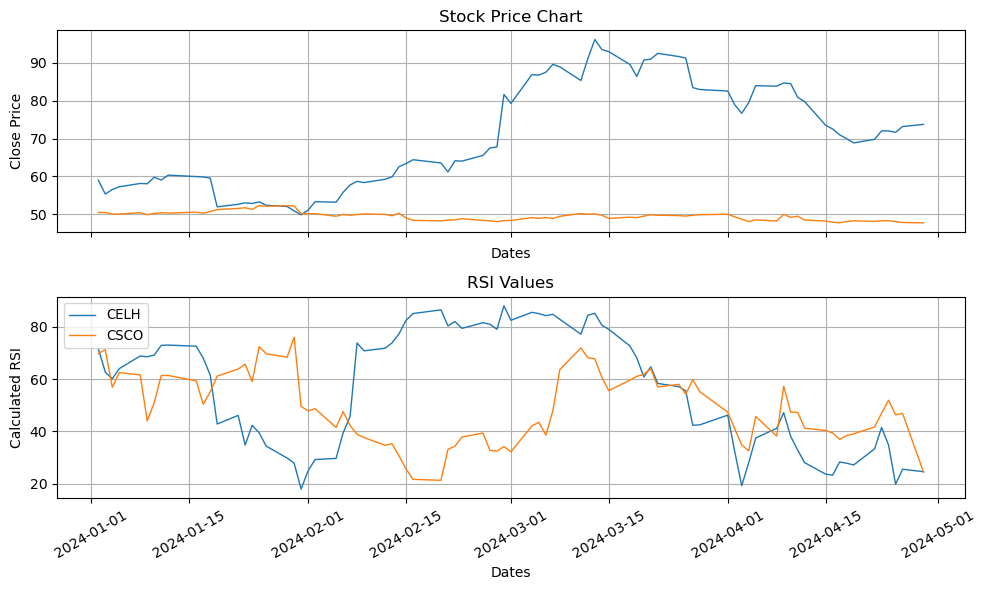

In [24]:
### Plot RSI for chosen ticker
# Create a list of tickers you want to plot
tickers_to_plot = ['SNAP', 'IBM']
stock_data_to_plot = import_stock_data(tickers_to_plot, start_date)
rsi_df_to_plot, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers_to_plot)

# Call plot_function with the correct arguments
plot = plot_function(stock_data_to_plot, rsi_df_to_plot, tickers = tickers_to_plot, indicator_type = 'RSI')
plot